<a href="https://colab.research.google.com/github/tdm09/assignment01-crisb-7/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importacion de librerias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math 
from itertools import groupby

# **Conexion a la base de datos y carga**

In [ ]:
url_data = "https://raw.githubusercontent.com/G4LF0/Titanic/main/train.csv"

In [ ]:
df = pd.read_csv(url_data)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# **Limpieza y arreglo de los datos**

## **Prevista de los datos**

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Cambiando valores**

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

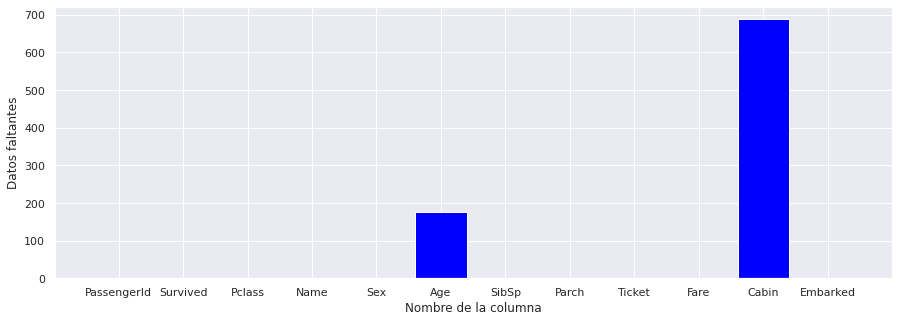

In [ ]:
bardata = df.isnull().sum()
plt.figure(figsize=(15,5))
plt.bar(df.columns, bardata, color = "blue")
plt.xlabel('Nombre de la columna')
plt.ylabel('Datos faltantes')
plt.show()

Cambiamos los valores nulos de la columna edad por la media de la edad

In [ ]:
df.fillna({'Age': df.Age.mean()}, inplace=True)

Cambiamos los valores del sexo, se encontraban en texto y los pasamos a una variable binaria.

In [ ]:
df.Sex = df.Sex.map({"male":1, "female":0})

Cambiamos los valores de la clase a su propia columna cada uno

In [ ]:
df = pd.get_dummies(df, columns = ["Pclass"])
df = df.drop(columns = ["PassengerId", "Name", "Ticket"])
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,0,38.0,1,0,71.2833,C85,C,1,0,0
2,1,0,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,0,35.0,1,0,53.1000,C123,S,1,0,0
4,0,1,35.0,0,0,8.0500,NaN,S,0,0,1


Cambiamos valores de las cabinas por sección por un número correspondiente (A=1, B=2, etc.)

### Correlación con secciones de cabinas

Creamos un subset de datos para analizar la relevancia de la sección de su cabina en la predicción.

In [ ]:
cab = df['Cabin']
secA, secB, secC, secD, secE, secF, secG, secT = [], [], [], [], [], [], [], []
for i in cab.index:
  if pd.isna(cab[i]):
    secA.append(float("nan"))
    secB.append(float("nan"))
    secC.append(float("nan"))
    secD.append(float("nan"))
    secE.append(float("nan"))
    secF.append(float("nan"))
    secT.append(float("nan"))
    continue
  if cab[i][0] == "A":
    secA.append(1)
  else:
    secA.append(0)
  if cab[i][0] == "B":
    secB.append(1)
  else:
    secB.append(0)
  if cab[i][0] == "C":
    secC.append(1)
  else:
    secC.append(0)
  if cab[i][0] == "D":
    secD.append(1)
  else:
    secD.append(0)
  if cab[i][0] == "E":
    secE.append(1)
  else:
    secE.append(0)
  if cab[i][0] == "F":
    secF.append(1)
  else:
    secF.append(0)
  if cab[i][0] == "T":
    secT.append(1)
  else:
    secT.append(0)

df["SectionA"] = pd.Series(secA)
df["SectionB"] = pd.Series(secB).values
df["SectionC"] = pd.Series(secC).values
df["SectionD"] = pd.Series(secD).values
df["SectionE"] = pd.Series(secE).values
df["SectionF"] = pd.Series(secF).values
df["SectionT"] = pd.Series(secT).values

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,SectionA,SectionB,SectionC,SectionD,SectionE,SectionF,SectionT
0,0,1,22.0,1,0,7.2500,NaN,S,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,38.0,1,0,71.2833,C85,C,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0,26.0,0,0,7.9250,NaN,S,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,35.0,1,0,53.1000,C123,S,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,1,35.0,0,0,8.0500,NaN,S,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Embarcamiento

Relevancia de Embarked en la predicción mediante otro subset.

In [ ]:
df = pd.get_dummies(df, columns = ["Embarked"])

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,SectionA,SectionB,SectionC,SectionD,SectionE,SectionF,SectionT,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1,1,0,38.0,1,0,71.2833,C85,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0
2,1,0,26.0,0,0,7.9250,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
3,1,0,35.0,1,0,53.1000,C123,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1
4,0,1,35.0,0,0,8.0500,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1


Vemos de nuevo que columnas tienen valores nulos,

In [ ]:
df.isnull().sum()

Survived        0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin         687
Pclass_1        0
Pclass_2        0
Pclass_3        0
SectionA      687
SectionB      687
SectionC      687
SectionD      687
SectionE      687
SectionF      687
SectionT      687
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

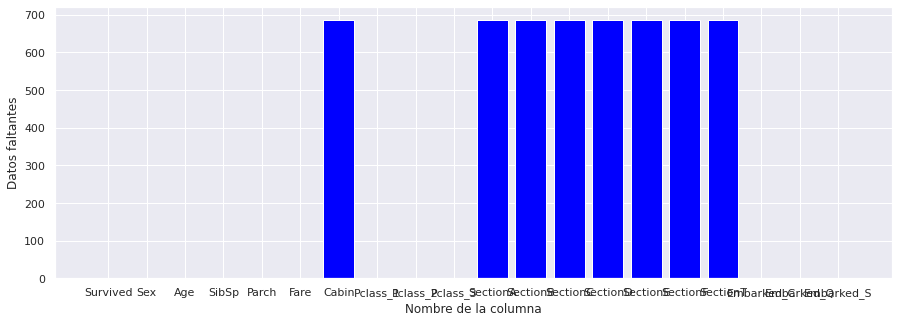

In [ ]:
bardata = df.isnull().sum()
plt.figure(figsize=(15,5))
plt.bar(df.columns, bardata, color = "blue")
plt.xlabel('Nombre de la columna')
plt.ylabel('Datos faltantes')
plt.show()

## **Mapa de calor**

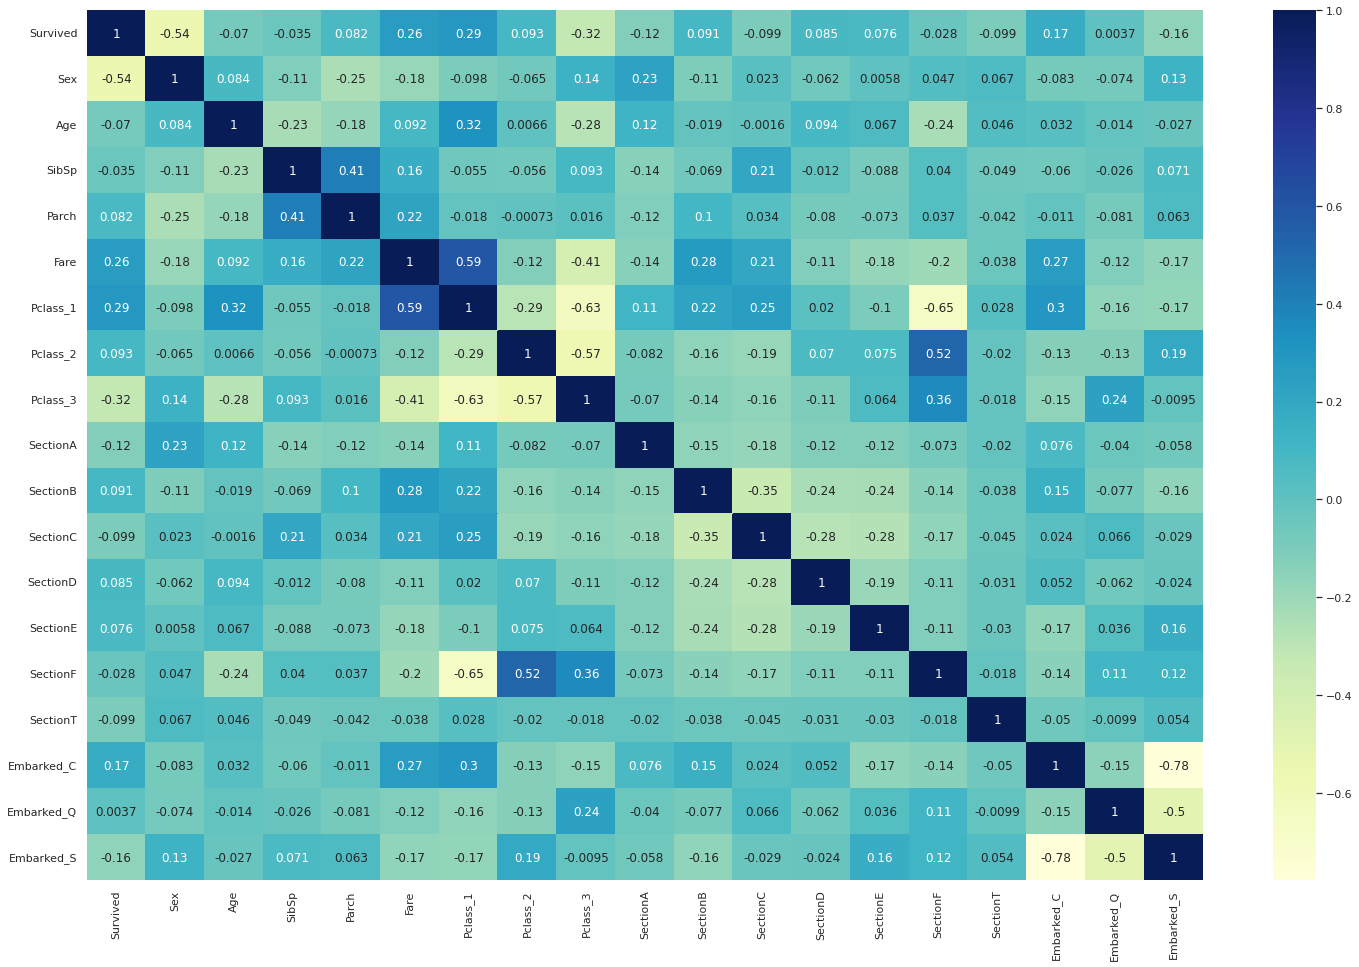

In [ ]:
sn.set(rc = {'figure.figsize':(25,16)})
sn.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

## **Eliminamos columnas con nula relacion**

In [ ]:
#df = df.drop(["Cabin", "Ticket", "PassengerId", "Name", "Pclass"], axis=1)

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,SectionA,SectionB,SectionC,SectionD,SectionE,SectionF,SectionT,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1,1,0,38.0,1,0,71.2833,C85,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0
2,1,0,26.0,0,0,7.9250,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
3,1,0,35.0,1,0,53.1000,C123,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1
4,0,1,35.0,0,0,8.0500,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1


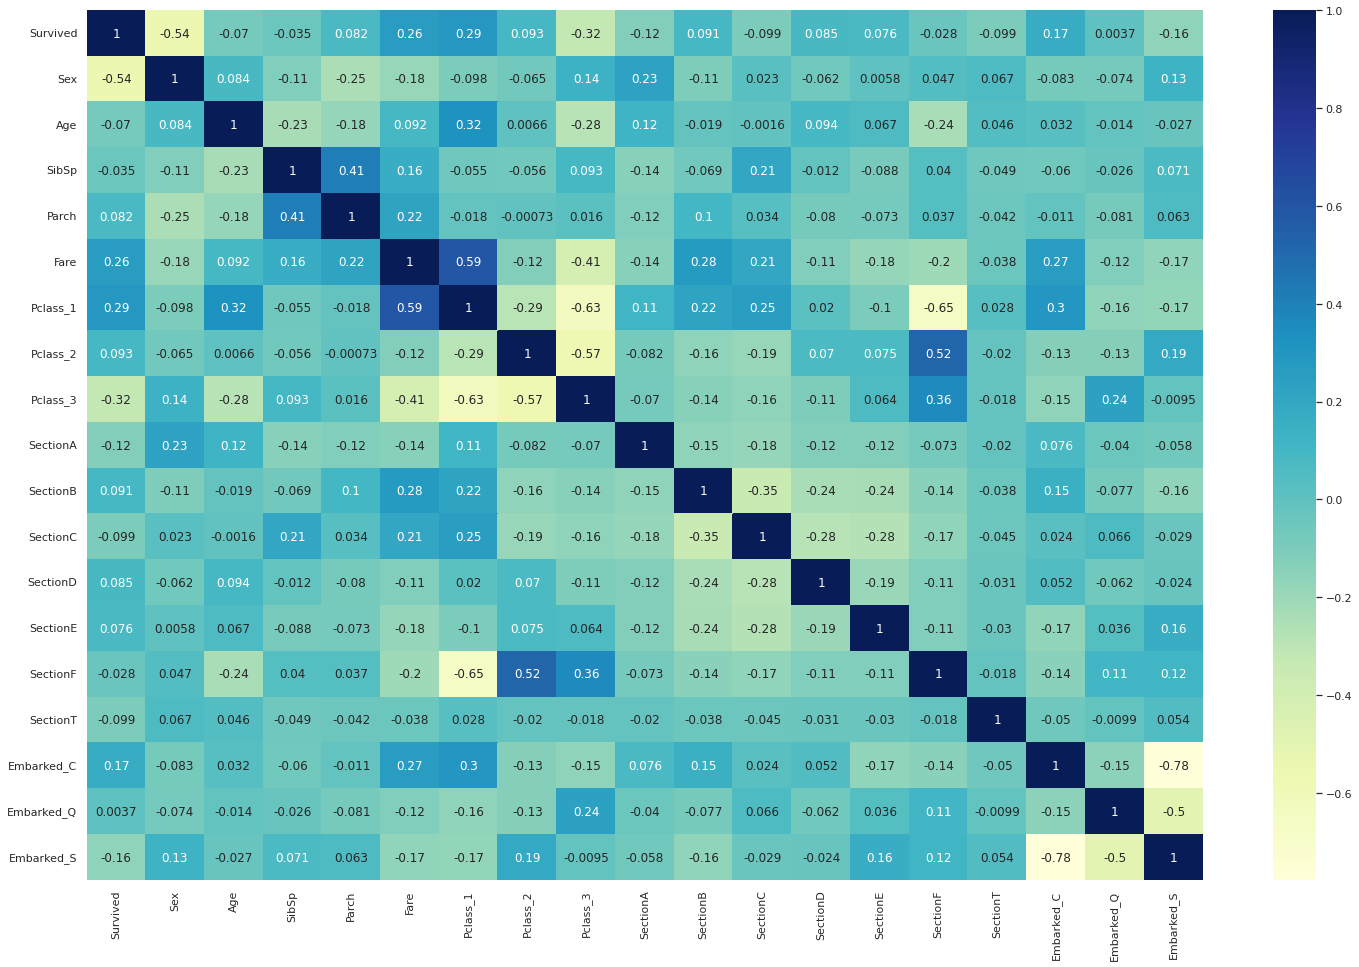

In [ ]:
sn.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

# **Analisis**

## **Porcentaje de supervivientes por clases y lugar de embarque**

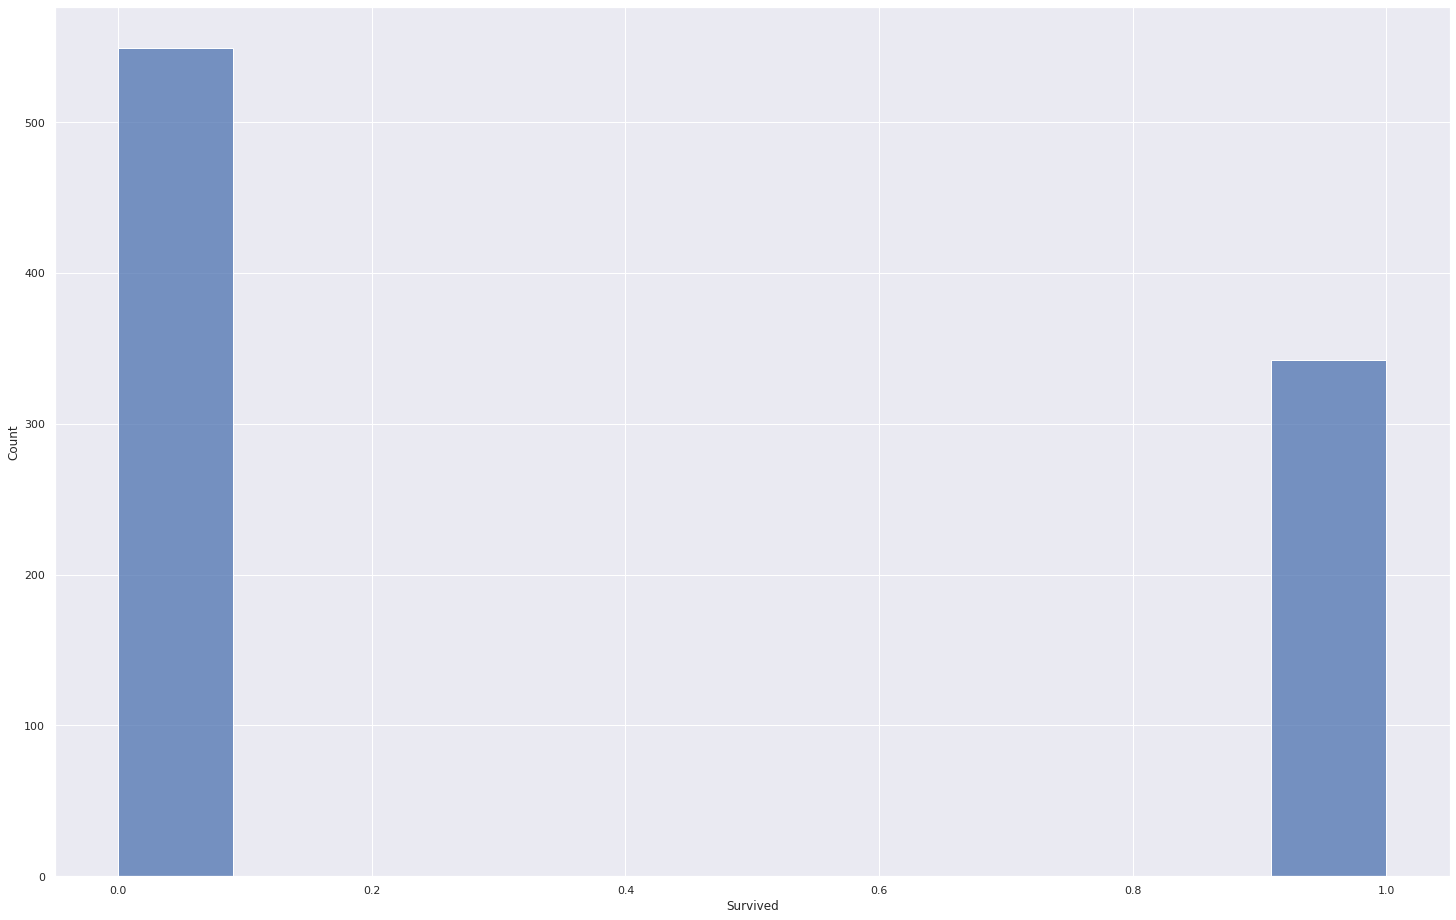

In [ ]:
sn.histplot(df, x="Survived")

In [ ]:
CantidadPrimera = df.groupby("Pclass_1").get_group(1).value_counts()
CantidadPrimera

Survived  Sex  Age   SibSp  Parch  Fare      Cabin    Pclass_1  Pclass_2  Pclass_3  SectionA  SectionB  SectionC  SectionD  SectionE  SectionF  SectionT  Embarked_C  Embarked_Q  Embarked_S
1         0    24.0  0      0      69.3000   B35      1         0         0         0.0       1.0       0.0       0.0       0.0       0.0       0.0       1           0           0             2
0         0    2.0   1      2      151.5500  C22 C26  1         0         0         0.0       0.0       1.0       0.0       0.0       0.0       0.0       0           0           1             1
1         0    48.0  1      0      39.6000   A16      1         0         0         1.0       0.0       0.0       0.0       0.0       0.0       0.0       1           0           0             1
               40.0  0      0      153.4625  C125     1         0         0         0.0       0.0       1.0       0.0       0.0       0.0       0.0       0           0           1             1
                     1      1      

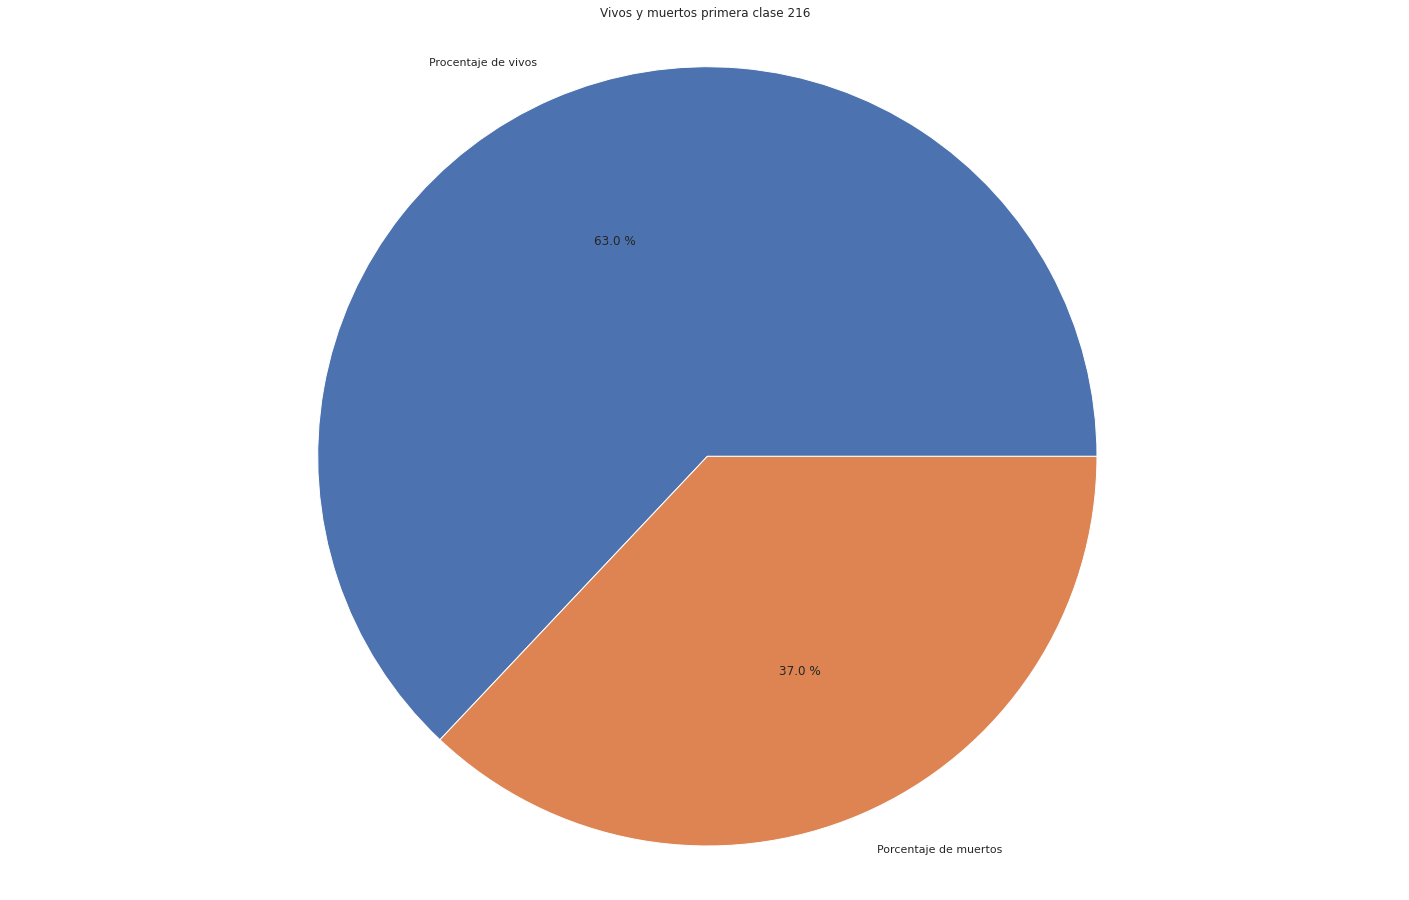

In [ ]:
CantidadPrimera = df.groupby("Pclass_1").get_group(1)


CantidadPrimeraVivos = CantidadPrimera.groupby("Survived").get_group(1)
CantidadPrimeraVivos = len(CantidadPrimeraVivos)

CantidadPrimeraMuertos = CantidadPrimera.groupby("Survived").get_group(0)
CantidadPrimeraMuertos = len(CantidadPrimeraMuertos)

pastelPrimera = [CantidadPrimeraVivos, CantidadPrimeraMuertos]
titulosPrimera = ["Procentaje de vivos", "Porcentaje de muertos"]
plt.title("Vivos y muertos primera clase" + " " + str(len(CantidadPrimera)) )
plt.pie(pastelPrimera, labels=titulosPrimera, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

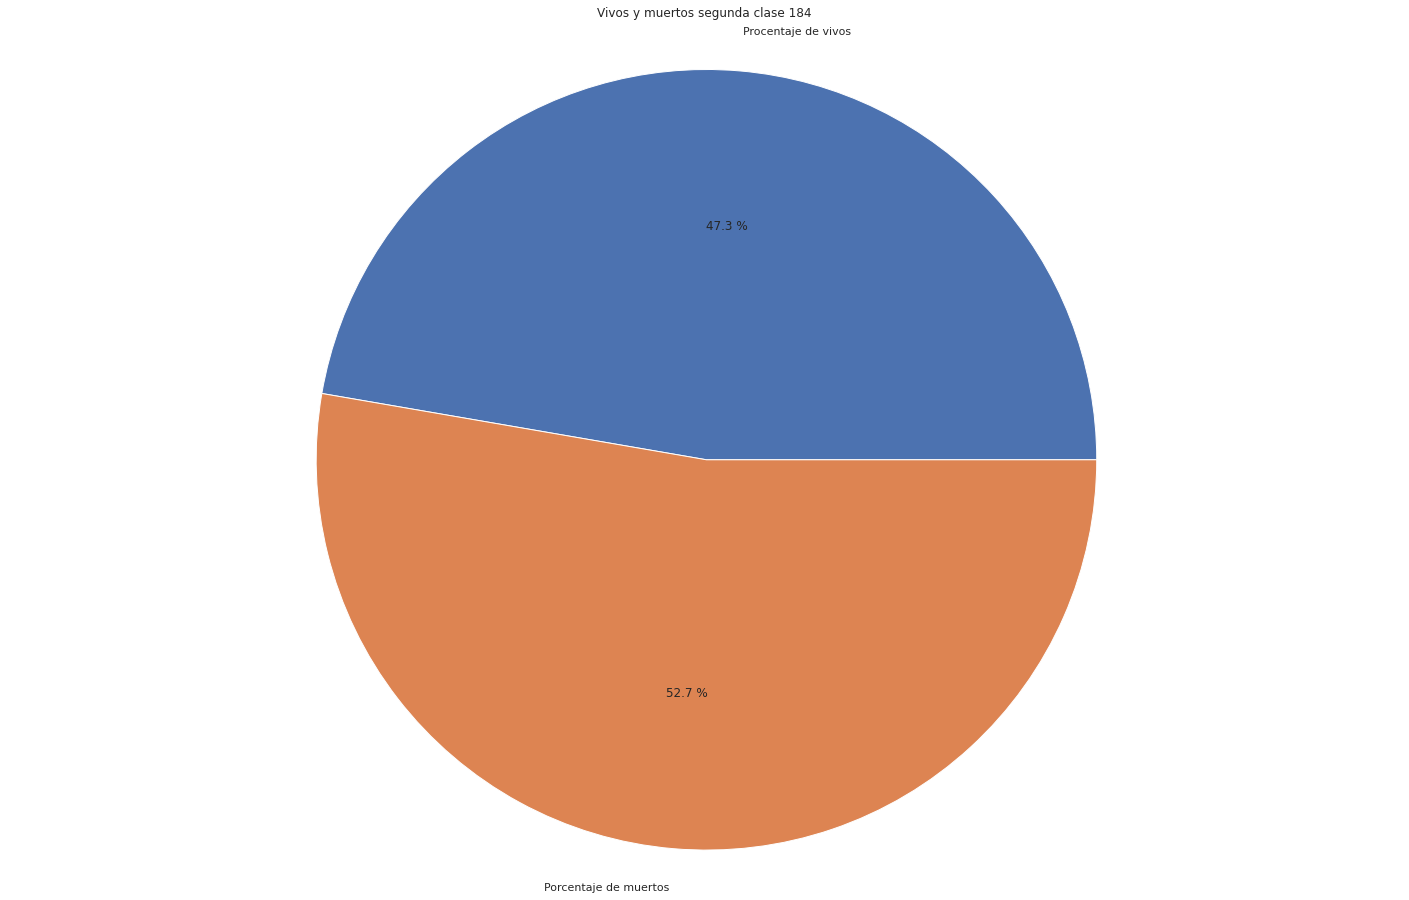

In [ ]:
CantidadSegunda = df.groupby("Pclass_2").get_group(1)


CantidadSegundaVivos = CantidadSegunda.groupby("Survived").get_group(1)
CantidadSegundaVivos = len(CantidadSegundaVivos)

CantidadSegundaMuertos = CantidadSegunda.groupby("Survived").get_group(0)
CantidadSegundaMuertos = len(CantidadSegundaMuertos)

pastelSegunda = [CantidadSegundaVivos, CantidadSegundaMuertos]
titulosSegunda = ["Procentaje de vivos", "Porcentaje de muertos"]
plt.title("Vivos y muertos segunda clase" + " " + str(len(CantidadSegunda)) )
plt.pie(pastelSegunda, labels=titulosSegunda, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

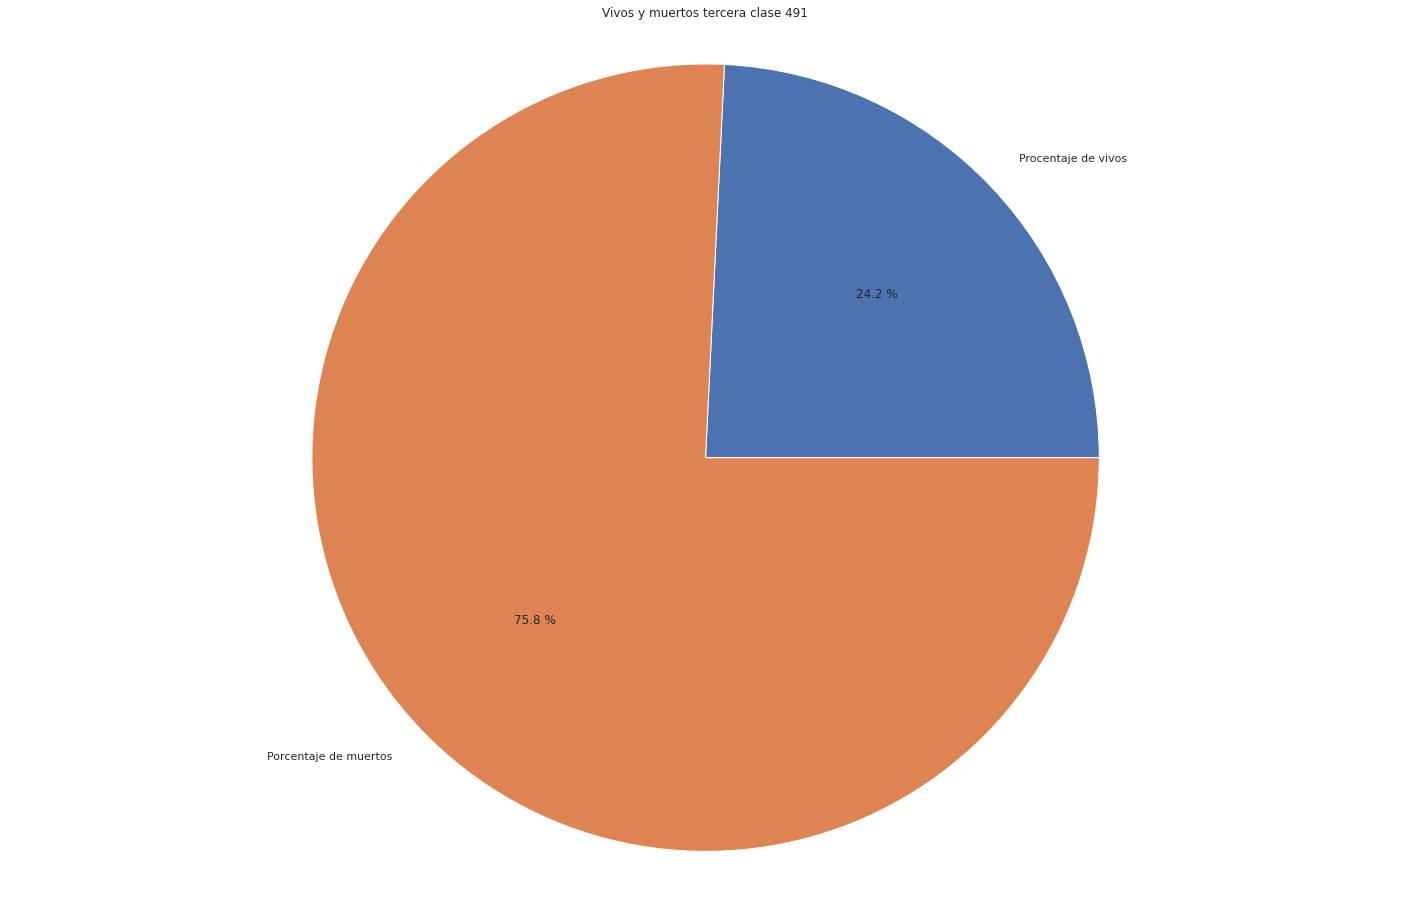

In [ ]:
CantidadTercera = df.groupby("Pclass_3").get_group(1)

CantidadTerceraVivos = CantidadTercera.groupby("Survived").get_group(1)
CantidadTerceraVivos = len(CantidadTerceraVivos)


CantidadTerceraMuertos = CantidadTercera.groupby("Survived").get_group(0)
CantidadTerceraMuertos = len(CantidadTerceraMuertos)


pastelTercera = [CantidadTerceraVivos, CantidadTerceraMuertos]
titulosTercera = ["Procentaje de vivos", "Porcentaje de muertos"]
plt.title("Vivos y muertos tercera clase" + " " + str(len(CantidadTercera)) )
plt.pie(pastelTercera, labels=titulosTercera, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

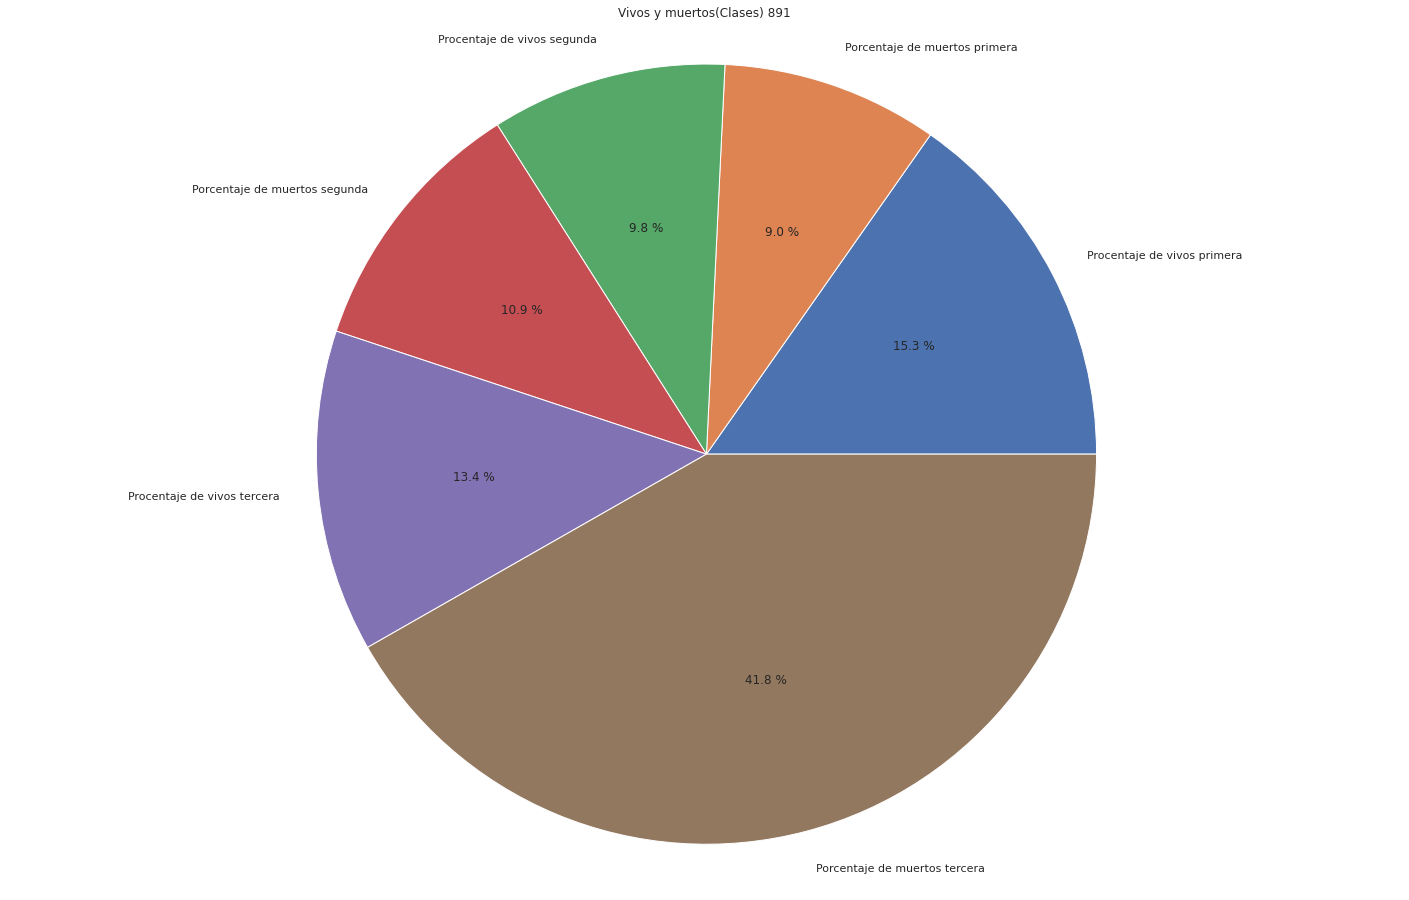

In [ ]:
pastelTotal = [CantidadPrimeraVivos, CantidadPrimeraMuertos,
                 CantidadSegundaVivos, CantidadSegundaMuertos,
                 CantidadTerceraVivos, CantidadTerceraMuertos]
titulosTotal = ["Procentaje de vivos primera", "Porcentaje de muertos primera",
                  "Procentaje de vivos segunda", "Porcentaje de muertos segunda",
                  "Procentaje de vivos tercera", "Porcentaje de muertos tercera"]


plt.title("Vivos y muertos(Clases)" + " " + str(len(df)) )
plt.pie(pastelTotal, labels=titulosTotal, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

Text(0.5, 1.0, 'Hombres vs mujeres')

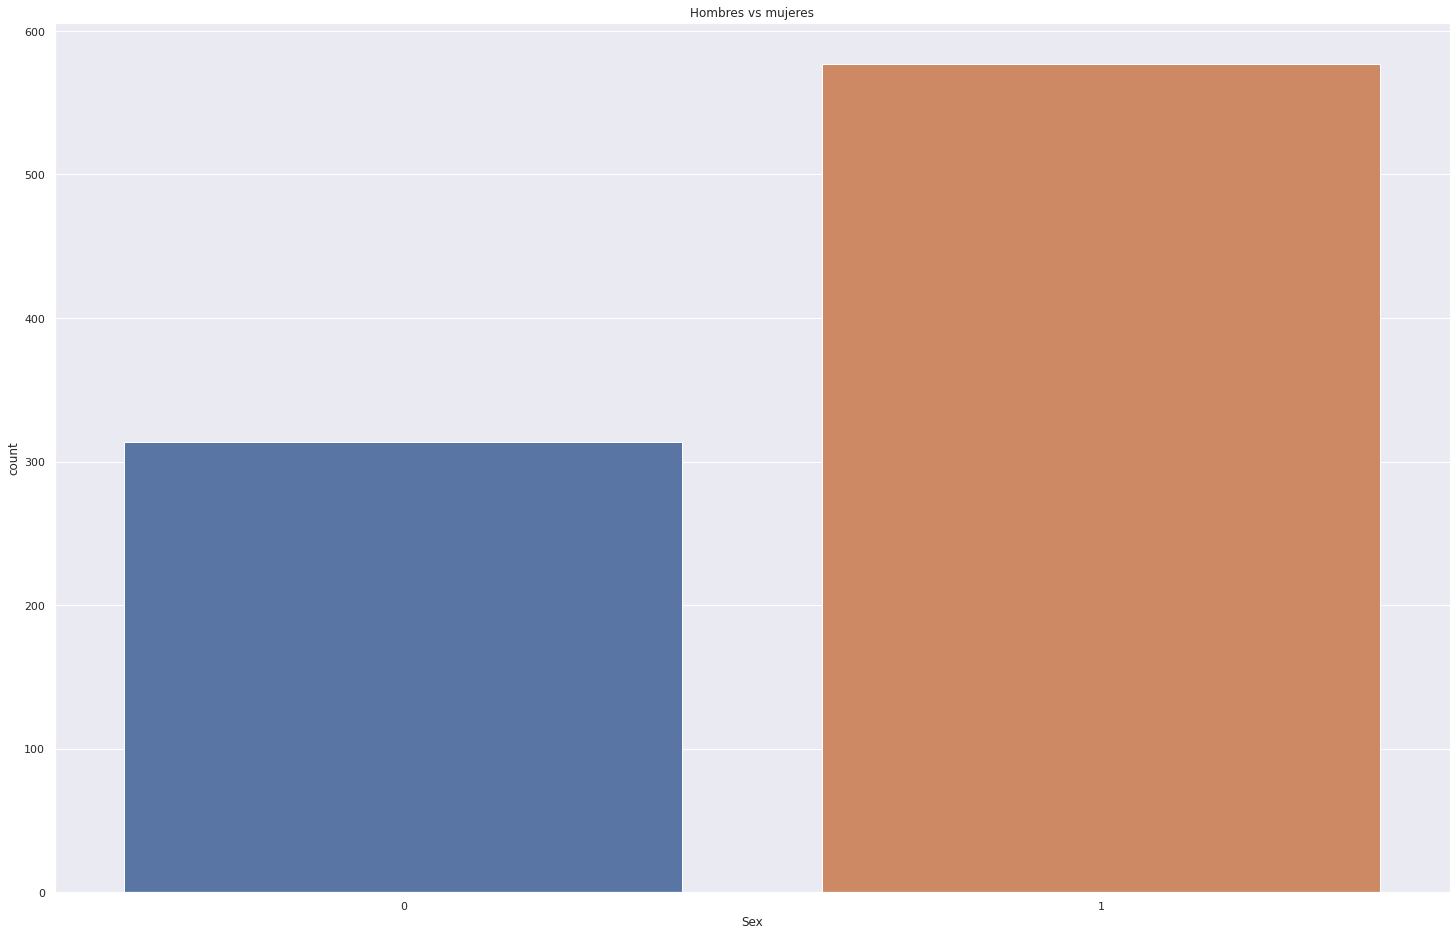

In [ ]:
sn.countplot(x = "Sex", data = df)
plt.title("Hombres vs mujeres")

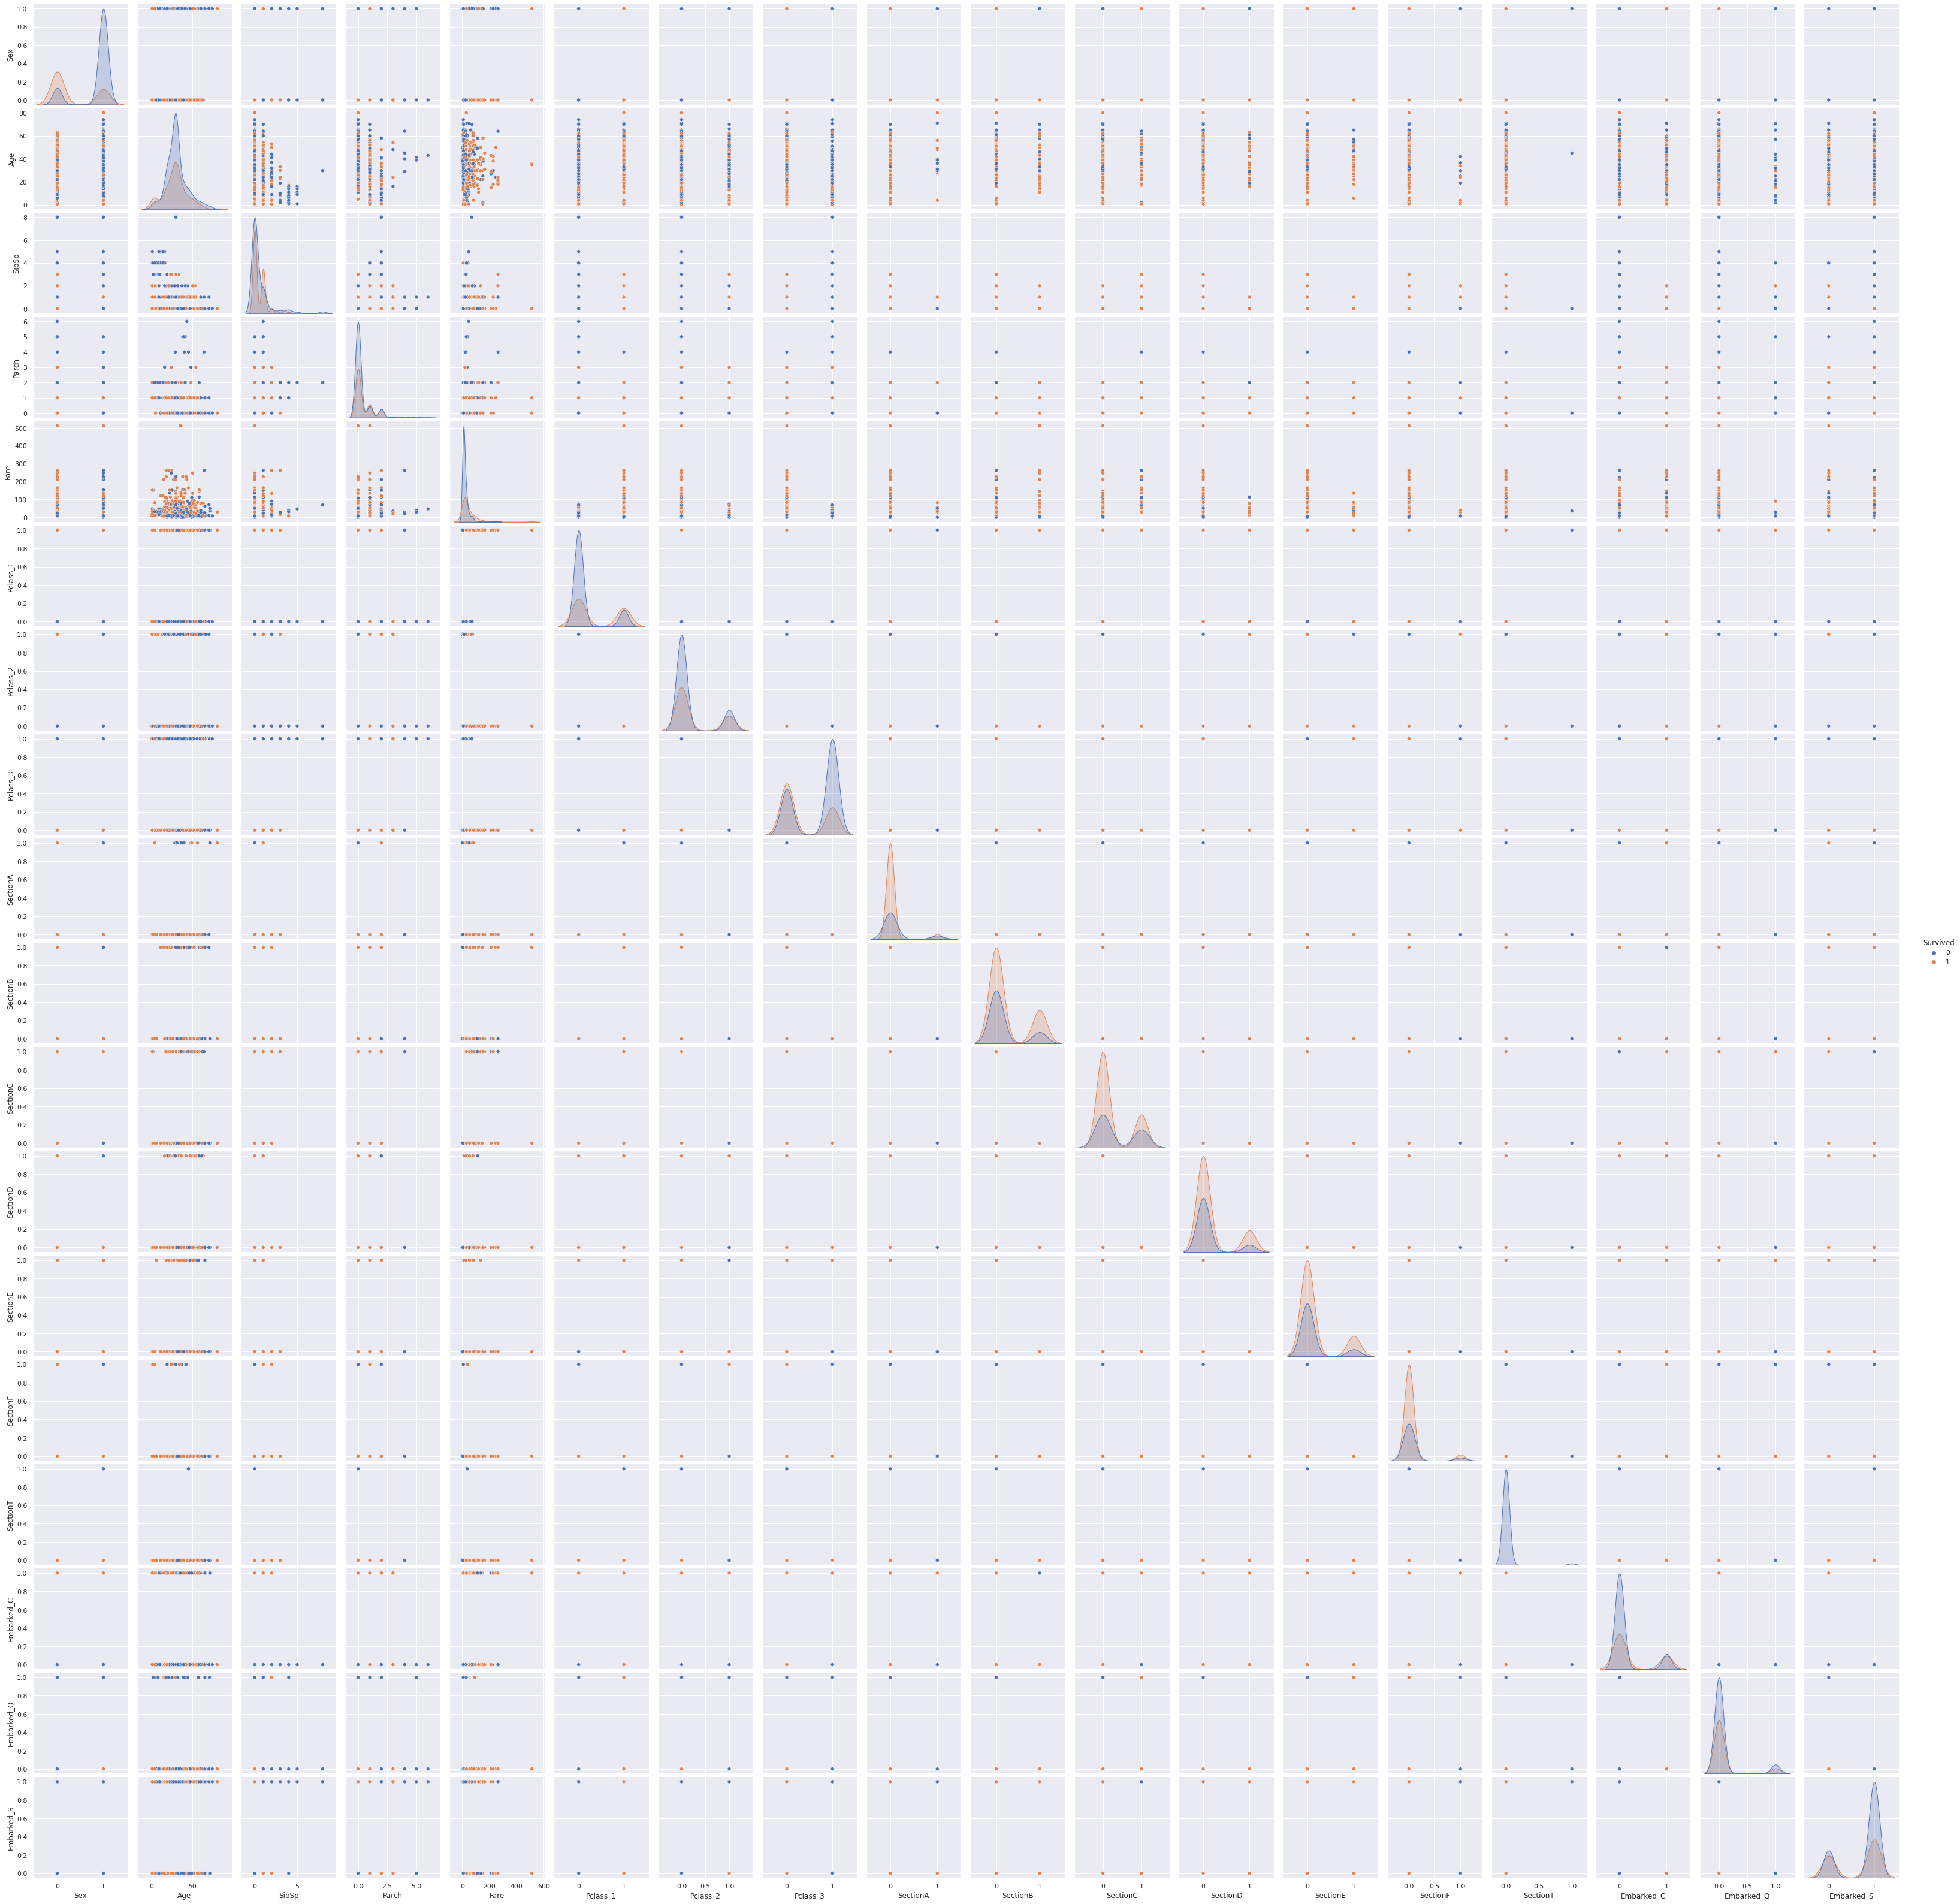

In [ ]:
sn.pairplot(df, hue = "Survived")

Text(0.5, 1.0, 'Frecuencia de edades')

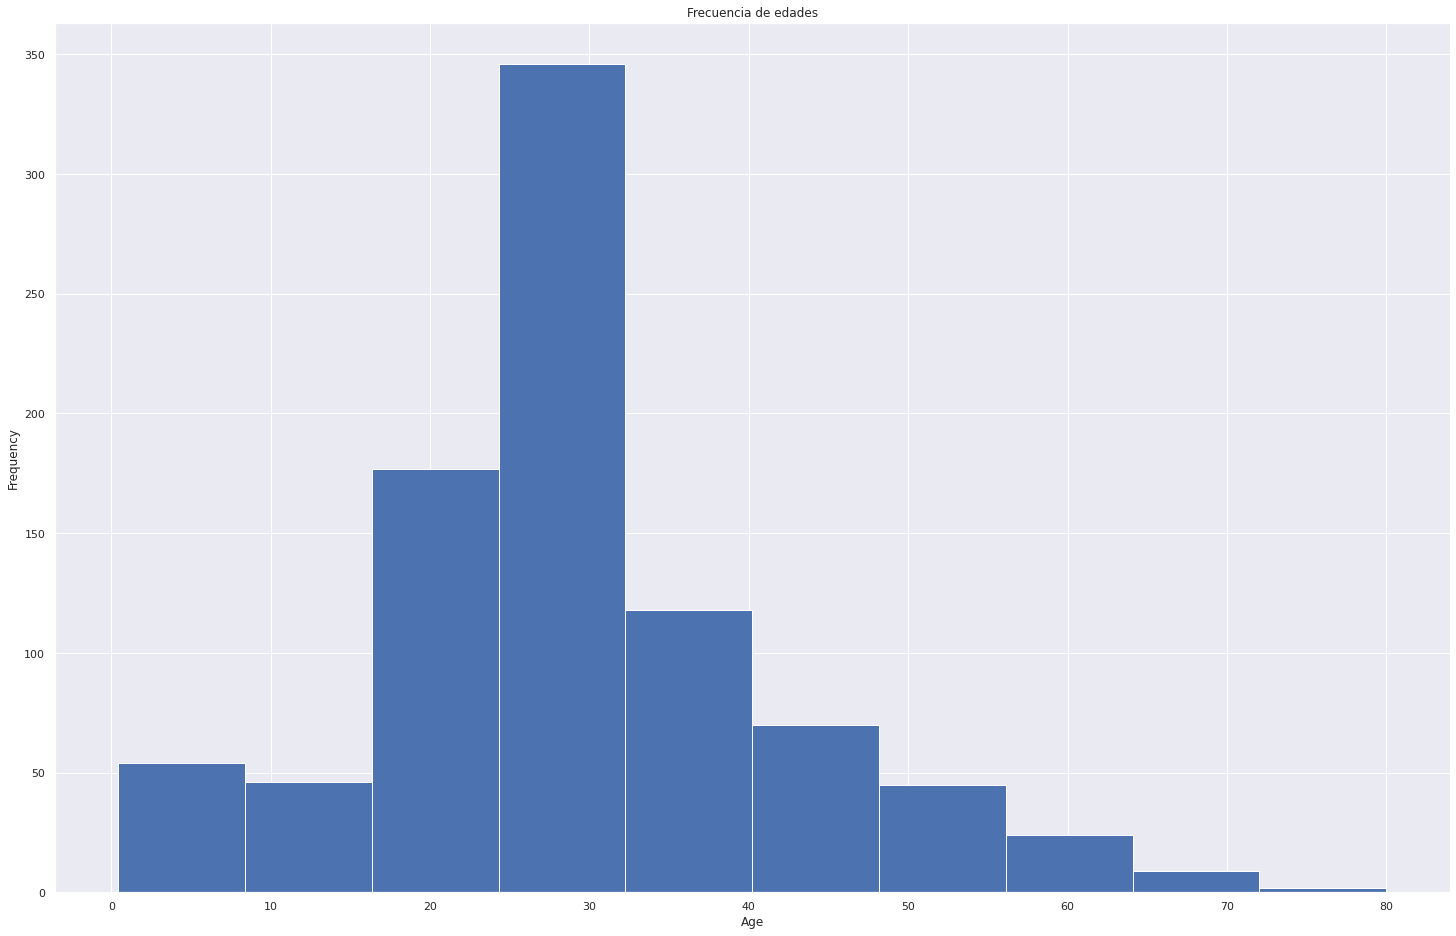

In [ ]:
plt.hist(df.Age)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Frecuencia de edades")

Text(0.5, 1.0, 'Frecuencia de costo del pasaje')

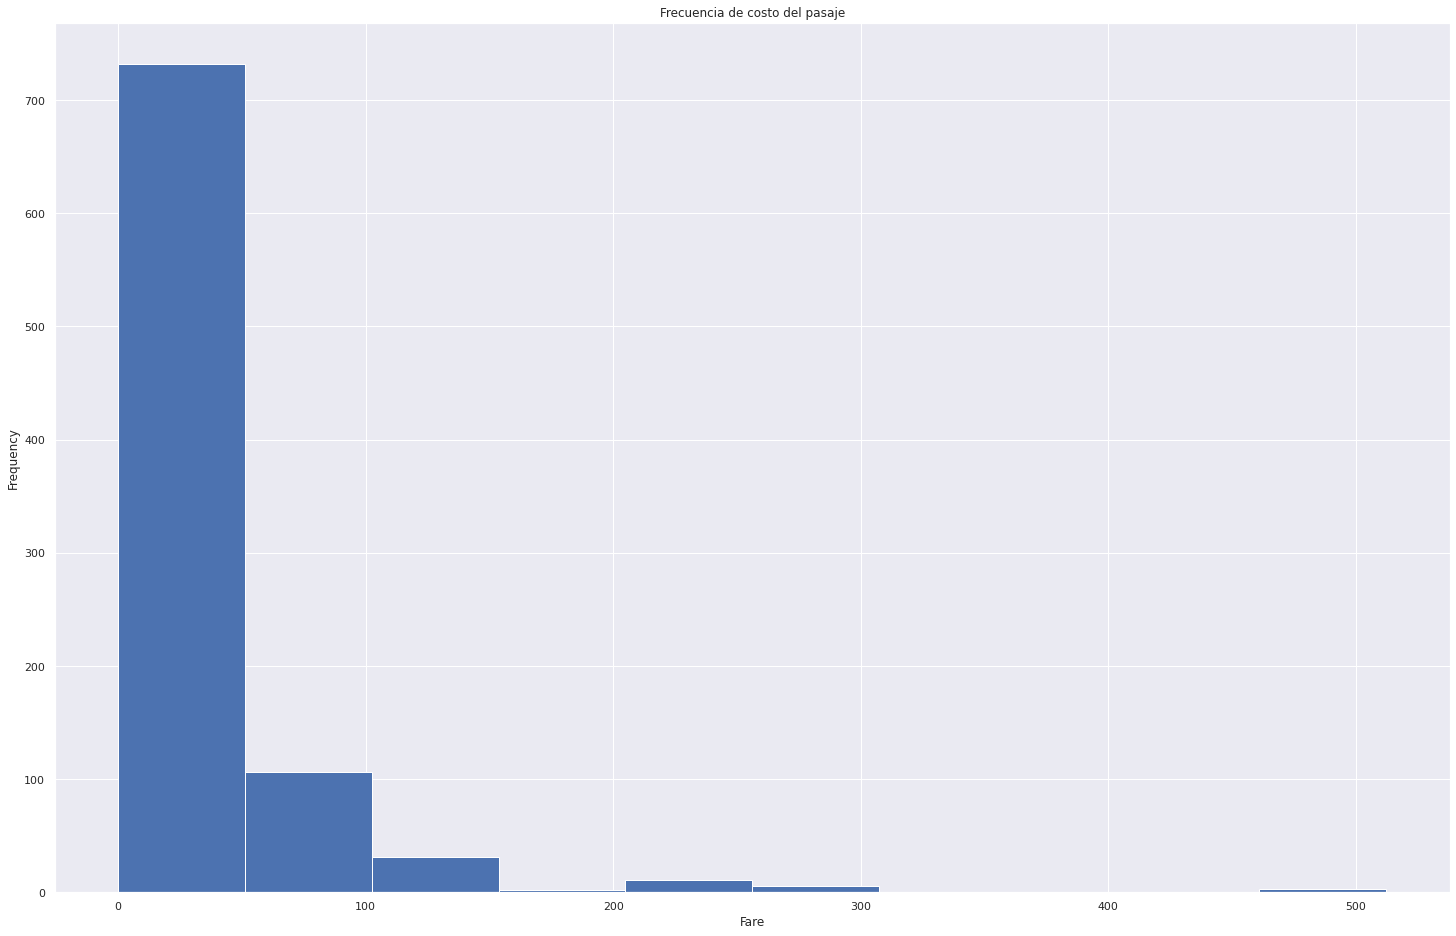

In [ ]:
plt.hist(df.Fare)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Frecuencia de costo del pasaje")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


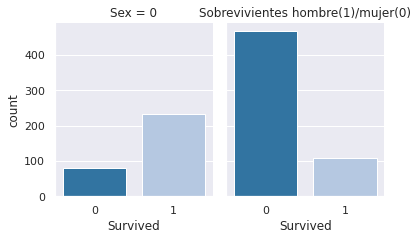

In [ ]:
sn.catplot("Survived", col="Sex", data=df, kind="count", height=3.5, aspect=.8, 
                palette='tab20')
plt.title("Sobrevivientes hombre(1)/mujer(0)")
plt.show()

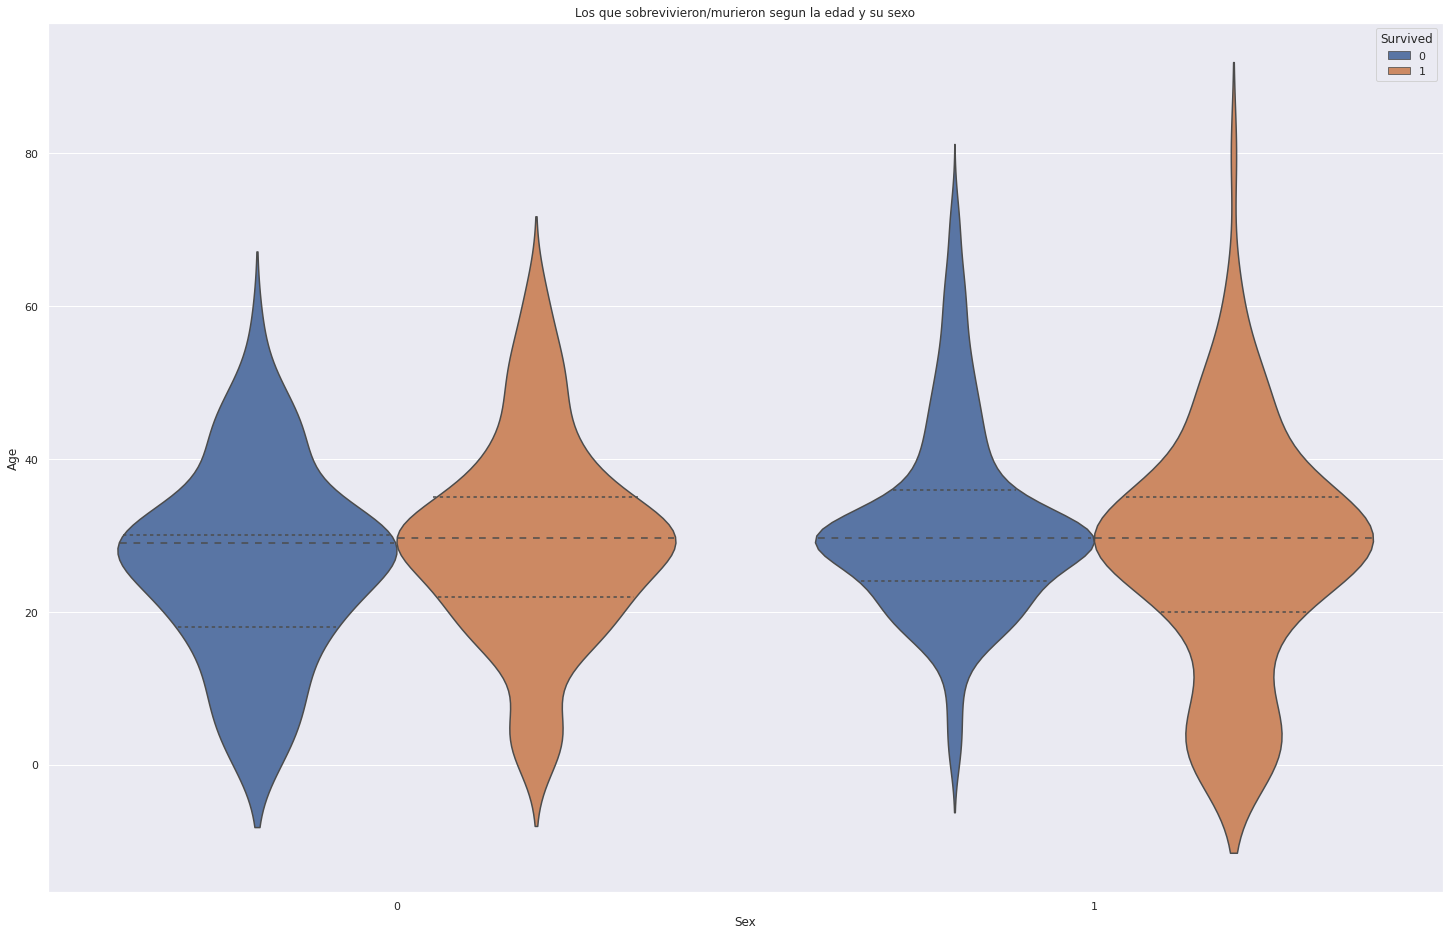

In [ ]:
sn.violinplot(x='Sex', y='Age', data=df, hue='Survived', scale='width', inner='quartile')
plt.title('Los que sobrevivieron/murieron segun la edad y su sexo')
plt.show()

In [ ]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,SectionA,SectionB,SectionC,SectionD,SectionE,SectionF,SectionT,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.000000,1,0,7.2500,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1,1,0,38.000000,1,0,71.2833,C85,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0
2,1,0,26.000000,0,0,7.9250,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
3,1,0,35.000000,1,0,53.1000,C123,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1
4,0,1,35.000000,0,0,8.0500,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,13.0000,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
887,1,0,19.000000,0,0,30.0000,B42,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1
888,0,0,29.699118,1,2,23.4500,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
889,1,1,26.000000,0,0,30.0000,C148,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0


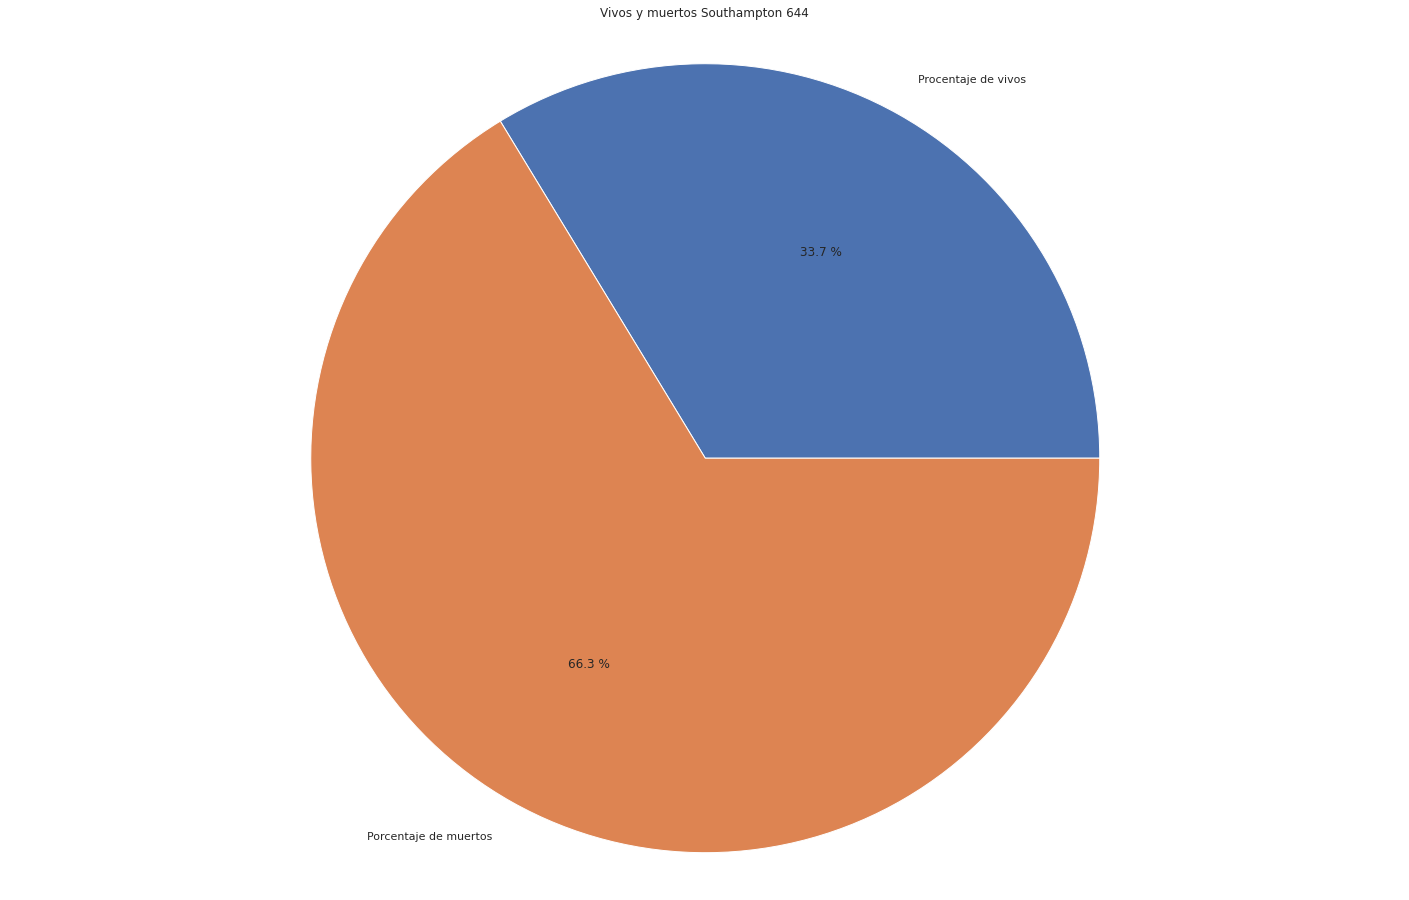

In [ ]:
CantidadS = df.groupby("Embarked_S").get_group(1)


CantidadSVivos = CantidadS.groupby("Survived").get_group(1)
CantidadSVivos = len(CantidadSVivos)


CantidadSMuertos = CantidadS.groupby("Survived").get_group(0)
CantidadSMuertos = len(CantidadSMuertos)

pastelS = [CantidadSVivos, CantidadSMuertos]
titulosS = ["Procentaje de vivos", "Porcentaje de muertos"]
plt.title("Vivos y muertos Southampton" + " " + str(len(CantidadS)) )
plt.pie(pastelS, labels=titulosS, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

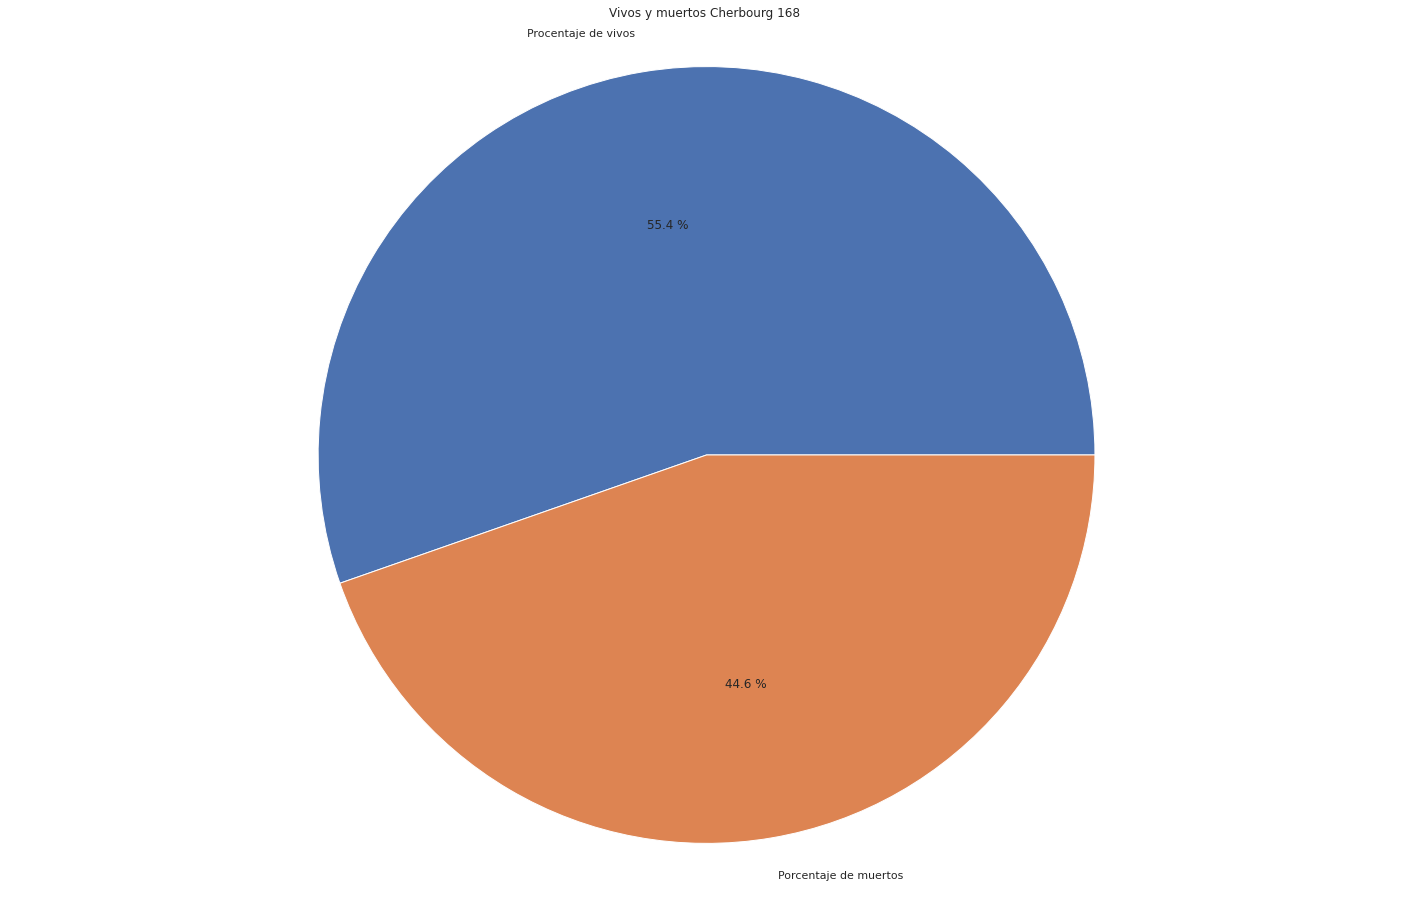

In [ ]:
CantidadC = df.groupby("Embarked_C").get_group(1)


CantidadCVivos = CantidadC.groupby("Survived").get_group(1)
CantidadCVivos = len(CantidadCVivos)


CantidadCMuertos = CantidadC.groupby("Survived").get_group(0)
CantidadCMuertos = len(CantidadCMuertos)

pastelC = [CantidadCVivos, CantidadCMuertos]
titulosC = ["Procentaje de vivos", "Porcentaje de muertos"]
plt.title("Vivos y muertos Cherbourg" + " " + str(len(CantidadC)) )
plt.pie(pastelC, labels=titulosC, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

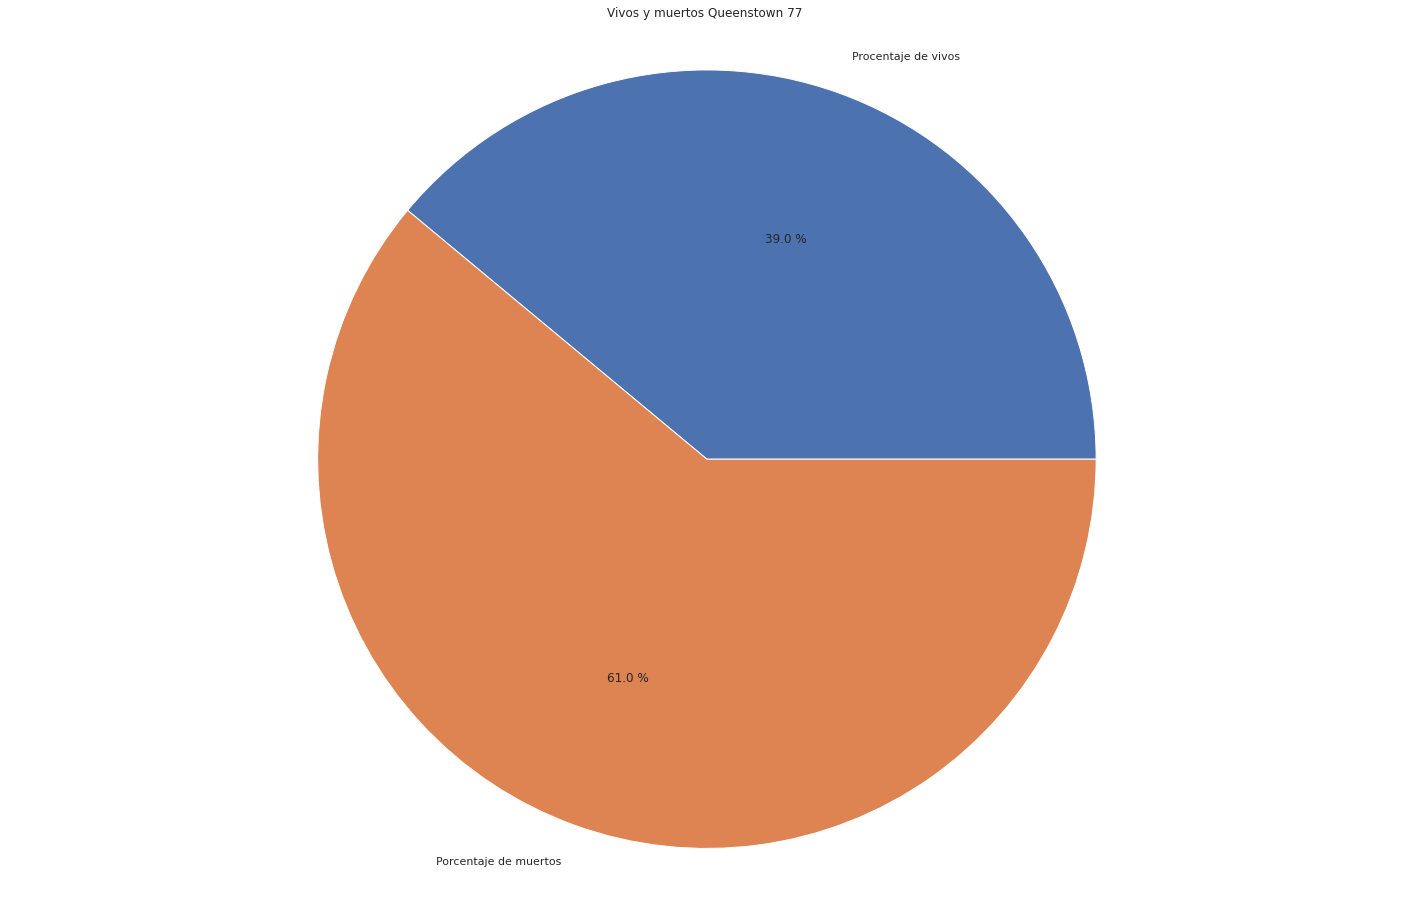

In [ ]:
CantidadQ = df.groupby("Embarked_Q").get_group(1)


CantidadQVivos = CantidadQ.groupby("Survived").get_group(1)
CantidadQVivos = len(CantidadQVivos)


CantidadQMuertos = CantidadQ.groupby("Survived").get_group(0)
CantidadQMuertos = len(CantidadQMuertos)

pastelQ = [CantidadQVivos, CantidadQMuertos]
titulosQ = ["Procentaje de vivos", "Porcentaje de muertos"]
plt.title("Vivos y muertos Queenstown" + " " + str(len(CantidadQ)) )
plt.pie(pastelQ, labels=titulosQ, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

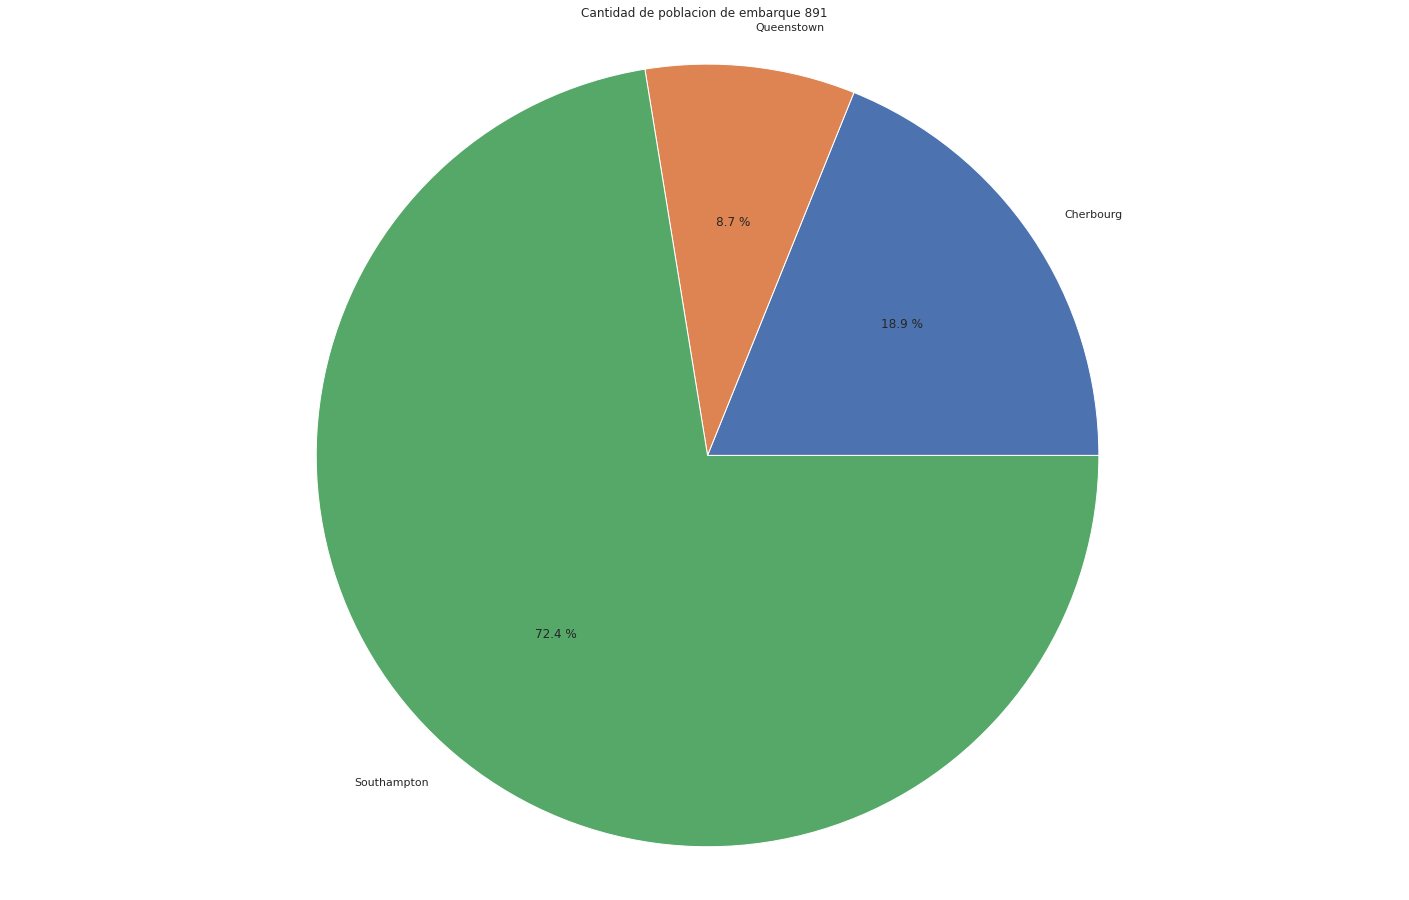

In [ ]:
pastel = [len(CantidadC), len(CantidadQ), len(CantidadS)]
titulos = ["Cherbourg", "Queenstown", "Southampton"]
plt.title("Cantidad de poblacion de embarque" + " " + str(len(df)) )
plt.pie(pastel, labels=titulos, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

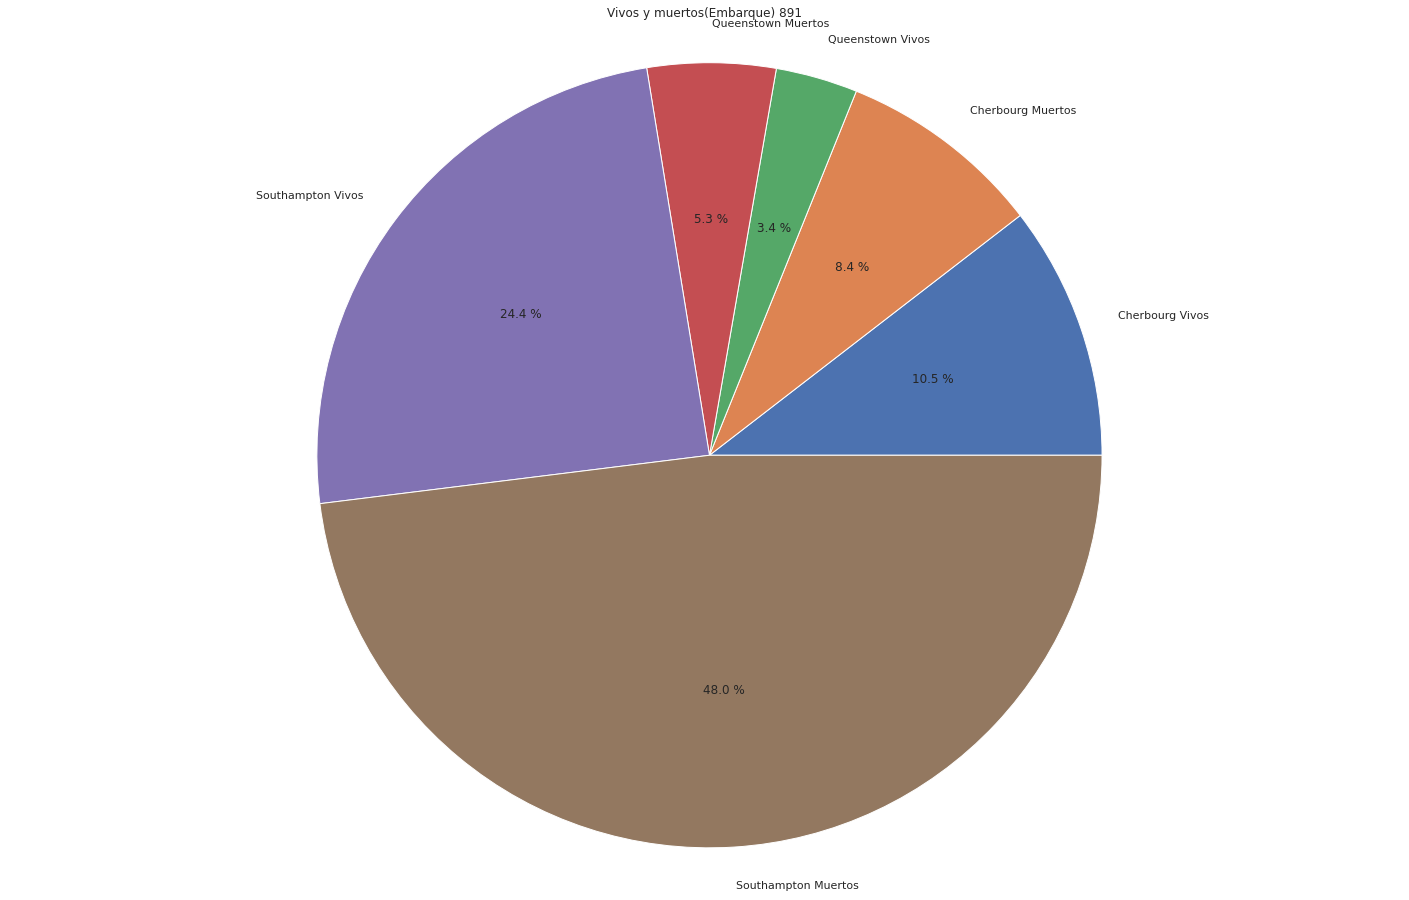

In [ ]:
pastelTotal = [CantidadCVivos, CantidadCMuertos,
               CantidadQVivos, CantidadQMuertos,
               CantidadSVivos, CantidadSMuertos]
titulosTotal = ["Cherbourg Vivos", "Cherbourg Muertos",
                "Queenstown Vivos", "Queenstown Muertos",
                "Southampton Vivos","Southampton Muertos"]
plt.title("Vivos y muertos(Embarque)" + " " + str(len(df)) )
plt.pie(pastelTotal, labels=titulosTotal, autopct="%0.1f %%")
plt.axis("equal")
plt.show()
# Hace falta redimensionar la grafica

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


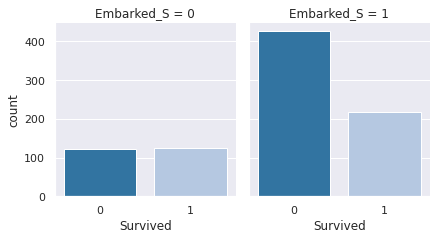

In [ ]:
sn.catplot("Survived", col="Embarked_S", col_wrap=8, data=df, kind="count", height=3.5, aspect=.8, palette='tab20')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


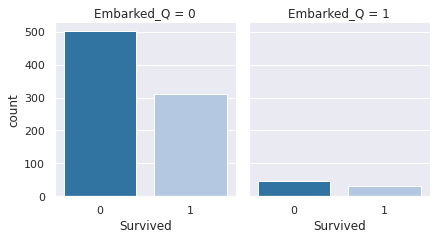

In [ ]:
sn.catplot("Survived", col="Embarked_Q", col_wrap=8, data=df, kind="count", height=3.5, aspect=.8, palette='tab20')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


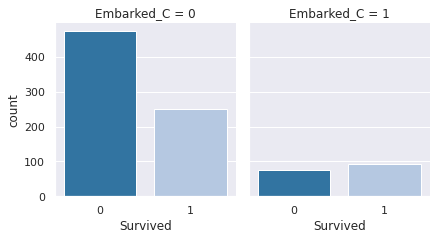

In [ ]:
sn.catplot("Survived", col="Embarked_C", col_wrap=8, data=df, kind="count", height=3.5, aspect=.8, palette='tab20')
plt.show()

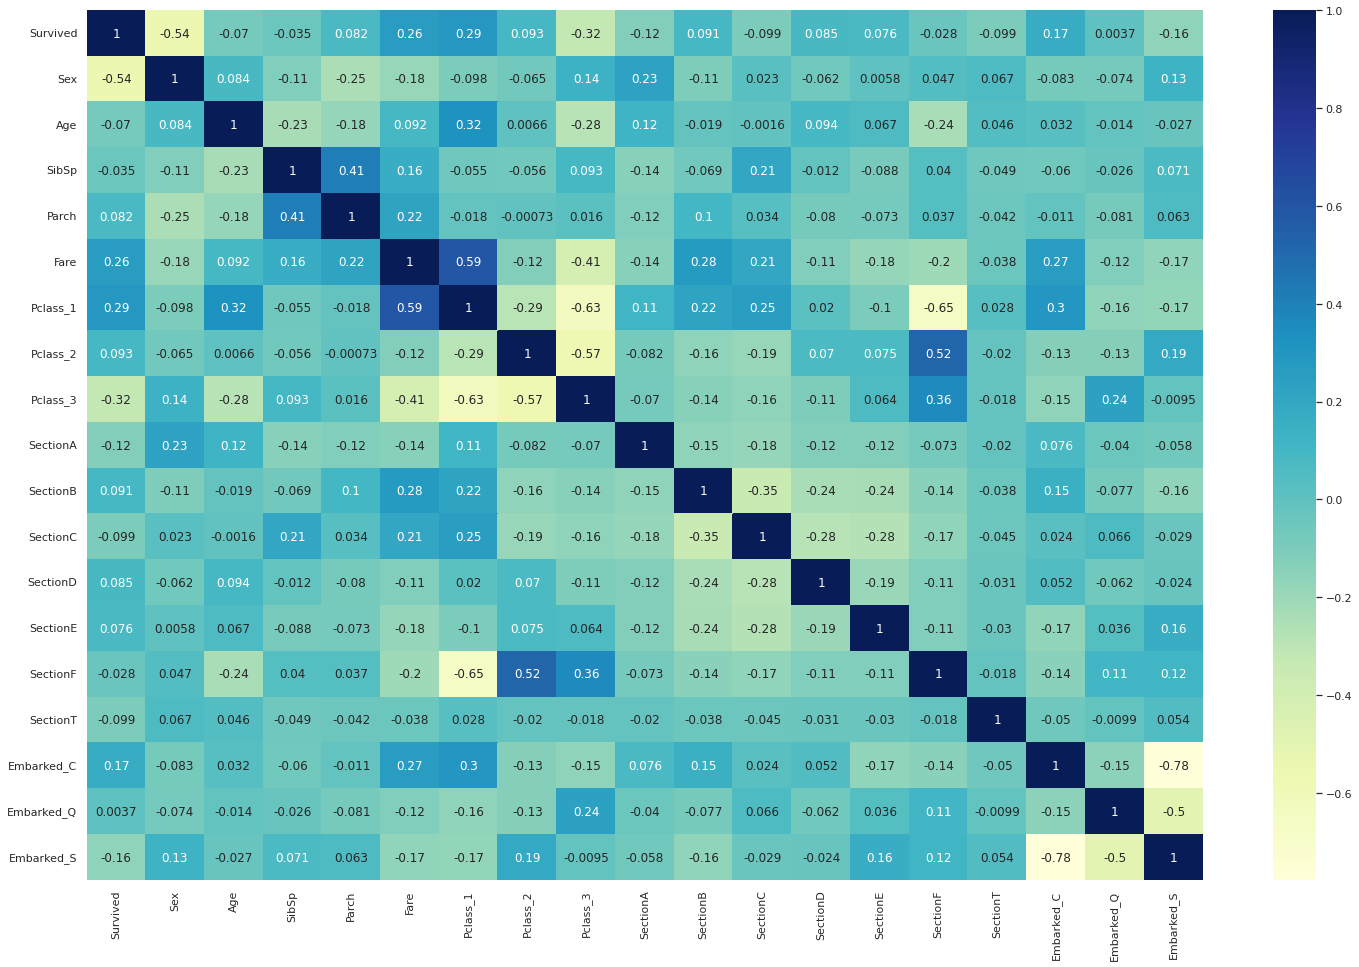

In [ ]:
sn.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

# **Limpieza final antes del algoritmo**

In [ ]:
train = df[["Survived", "Sex", "Fare", "Pclass_1", "Pclass_3", "Embarked_C", "Embarked_S"]]
train.head(5)

,Survived,Sex,Fare,Pclass_1,Pclass_3,Embarked_C,Embarked_S
0,0,1,7.2500,0,1,0,1
1,1,0,71.2833,1,0,1,0
2,1,0,7.9250,0,1,0,1
3,1,0,53.1000,1,0,0,1
4,0,1,8.0500,0,1,0,1


In [ ]:
url_data_test = "https://raw.githubusercontent.com/G4LF0/Titanic/main/test.csv"

In [ ]:
test = pd.read_csv(url_data_test)
test = test.drop(columns = ["PassengerId", "Name", "Ticket", "Age", "Parch", "SibSp", "Cabin"])

In [ ]:
test.head(5)

,Pclass,Sex,Fare,Embarked
0,3,male,7.8292,Q
1,3,female,7.0000,S
2,2,male,9.6875,Q
3,3,male,8.6625,S
4,3,female,12.2875,S


Se le hacen los mismos arreglos que le hicimos al dataset "train" al dataset "test"

In [ ]:
test.isnull().sum()

Pclass      0
Sex         0
Fare        1
Embarked    0
dtype: int64

In [ ]:
test.fillna({'Fare': test.Fare.mean()}, inplace=True)

In [ ]:
test = pd.get_dummies(test, columns=["Pclass"])

In [ ]:
test.Sex = test.Sex.map({"male":1, "female":0})

In [ ]:
test = pd.get_dummies(test, columns=["Embarked"])

In [ ]:
test = test.drop(columns = ["Embarked_Q", "Pclass_2"])

In [ ]:
test.head()

,Sex,Fare,Pclass_1,Pclass_3,Embarked_C,Embarked_S
0,1,7.8292,0,1,0,0
1,0,7.0000,0,1,0,1
2,1,9.6875,0,0,0,0
3,1,8.6625,0,1,0,1
4,0,12.2875,0,1,0,1


In [ ]:
train.head()

,Survived,Sex,Fare,Pclass_1,Pclass_3,Embarked_C,Embarked_S
0,0,1,7.2500,0,1,0,1
1,1,0,71.2833,1,0,1,0
2,1,0,7.9250,0,1,0,1
3,1,0,53.1000,1,0,0,1
4,0,1,8.0500,0,1,0,1


# Algoritmo Sklearn

In [ ]:
traintar = train.Survived

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(train, traintar, test_size = 0.2, random_state = 7)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [ ]:
kfold = StratifiedKFold(n_splits=5)
random_state = 5

In [ ]:
classifiers = []
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(GaussianNB())
classifiers.append(LinearSVC(random_state=random_state))

cv_results = []
cv_train = []
for classifier in classifiers:
    cv_train=classifier.fit(x_train, y = y_train)
    y_pred = classifier.predict(x_val)
    cv_results.append(accuracy_score(y_val,y_pred))
    
cv_res = pd.DataFrame({"Algorithm":["KNN","Decision Tree","Random Forest","Logistic Regression","SVC","Gaussian NB","Linear SVC"],"CrossValMeans":cv_results})
print(cv_res)

             Algorithm  CrossValMeans
0                  KNN       0.949721
1        Decision Tree       1.000000
2        Random Forest       1.000000
3  Logistic Regression       1.000000
4                  SVC       0.692737
5          Gaussian NB       1.000000
6           Linear SVC       1.000000


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# **KNN**

In [ ]:
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_val, y_val)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.93


In [ ]:
pred = knn.predict(x_val)
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[107   3]
 [  9  60]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       110
           1       0.95      0.87      0.91        69

    accuracy                           0.93       179
   macro avg       0.94      0.92      0.93       179
weighted avg       0.93      0.93      0.93       179

